In [22]:
# SVM (Support Vector Machine)
# kNN 알고리즘의 예시 상황은 주변 사람들에게 '여기는 강남인가요 강북인가요?'라고 물어보는 것이라면
# SVM 알고리즘의 예시 상황은 주변 사람들에게 '여기는 한강의 남쪽인가요 북쪽인가요?' 라고 물어보는 방식
# 한남, 압구정 등이 '한강' 이라는 결정 경계선과 가장 가까이 맞닿은 데이터 포인트 => '서포트 벡터'

# SVM 알고리즘의 과제는, 서포트 벡터들과 결정 경계선 사이의 거리 (마진)을 최대로 하는 것
# SVM 에서는 비용(C)이라는 변수를 사용함 -> 비용이 낮을 수록 마진을 최대한 높이고
# 학습 에러율을 증가시키는 방향으로 결정 경계선을 만듦 (마진을 가장 중요시 해야함)
# : 학습 시에 어느정도 에러율이 있었지만, 실제 운용 시 안정적인 분류를 할 수 있음

# 결정 경계는 데이터의 벡터 공간 N 차원 보다 한 차원 낮은 차원을 갖게 됨 (3차원 공간 데이터에선 '면' 형태)
# 결정 경계를 찾을 때, 차원이 너무 낮아 특정짓지 못하는 경우가 있음

# 커널 트릭 : 저차원에서 결정 경계를 못 찾는 경우 고차원으로 벡터를 옮겨 결정 경계를 찾는 기법
# 가우시안 RBF 커널 기법이 가장 많이 사용되는데, 함수의 표준 편차를 조정함으로써 결정 경계 곡률 조정함
# 이 때, 표준 편차를 조정하는 변수를 감마(Gamma) 라고 함
# 감마가 커지면 데이터 포인트 별로 허용하는 표준편차가 작아져서 결정 경계가 작아지고 구부러짐

# SVM 알고리즘은 비용(Cost), 감마(Gamma)를 조정함으로써 정확도를 높이는 것이 관건
# 비용 : 마진 너비 조절 변수. 클수록 마진 너비가 좁아지고, 작을수록 마진 너비가 넓어진다.
# 감마 : 커널의 표준 편차 조절 변수. 작을수록 데이터 포인트의 영향이 커져서 경계가 완만해지고
# 클수록 데이터 포인트가 결정 경계에 영향을 적게 미쳐 경계가 구부러짐

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


<ipython-input-23-393e1ab2b030>:86: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
<ipython-input-23-393e1ab2b030>:86: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
<ipython-input-23-393e1ab2b030>:86: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X an

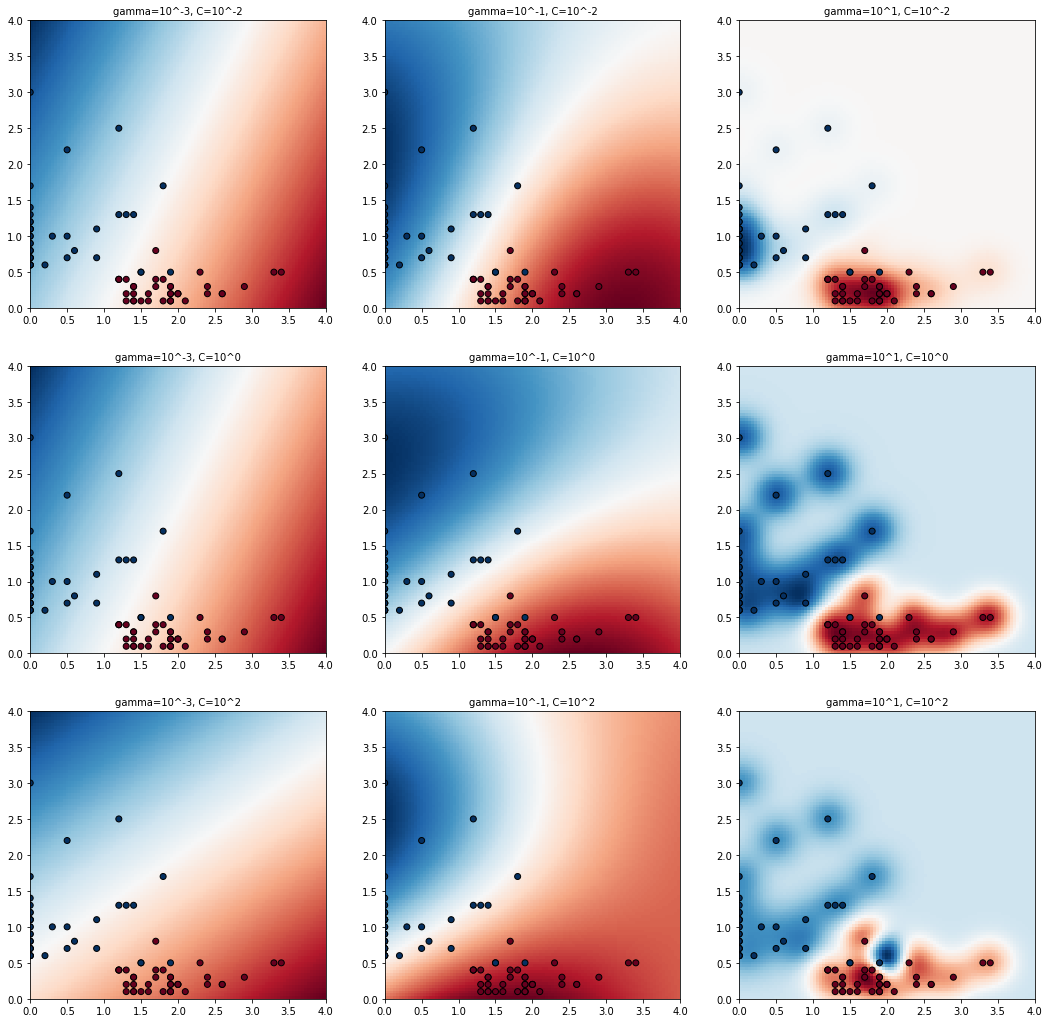

In [23]:
# 농구선수의 게임 기록을 학습해서 포지션을 예측해보기
# RBF 커널을 사용하므로 2개의 파라미터에 대한 최적 값 필요 (비용, 감마) -> Sklearn 그리드 서치 활용

import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np

df = pd.read_csv("basketball_stat.csv")
df.head()

# 다듬어진 데이터에서 20%를 테스트 데이터로 분류
train, test = train_test_split(df, test_size=0.2)

def svc_param_selection(X, y, nfolds):
    svm_parameters = [
        {'kernel': ['rbf'],
         'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
         'C': [0.01, 0.1, 1, 10, 100, 1000]
         }
    ]
    # 사이킷 런에서 제공하는 GridSearchCV를 사용해 최적의 파라미터 구함
    clf = GridSearchCV(SVC(), svm_parameters, cv=10)
    clf.fit(X, y)
    print(clf.best_params_)

    return clf

# 3점슛과 블로킹 횟수를 학습 데이터로 사용
X_train = train[['3P', 'BLK']]
# 농구선수 포지션을 예측값으로 선정
y_train = train[['Pos']]
# 최적의 파라미터로 학습된 모델을 clf로 저장
clf = svc_param_selection(X_train, y_train.values.ravel(), 10)


import matplotlib.pyplot as plt

# 시각화할 비용 후보들을 저장
C_candidates = []
C_candidates.append(clf.best_params_['C'] * 0.01)
C_candidates.append(clf.best_params_['C'])
C_candidates.append(clf.best_params_['C'] * 100)

# 시각화할 감마 후보들을 저장
gamma_candidates = []
gamma_candidates.append(clf.best_params_['gamma'] * 0.01)
gamma_candidates.append(clf.best_params_['gamma'])
gamma_candidates.append(clf.best_params_['gamma'] * 100)

# 3점슛과 블로킹 횟수로 학습
X = train[['3P', 'BLK']]
# 농구선수 포지션을 학습 모델의 분류값으로 사용
Y = train['Pos'].tolist()

# 시각화를 위해 센터(C)와 슈팅가드(SG)를 숫자로 표현e
position = []
for gt in Y:
    if gt == 'C':
        position.append(0)
    else:
        position.append(1)

classifiers = []

# 파라미터 후보들을 조합해서 학습된 모델을 저장
for C in C_candidates:
    for gamma in gamma_candidates:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X, Y)
        classifiers.append((C, gamma, clf))

# 각 모델을 시각화
plt.figure(figsize=(18, 18))
xx, yy = np.meshgrid(np.linspace(0, 4, 100), np.linspace(0, 4, 100))

for (k, (C, gamma, clf)) in enumerate(classifiers):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(len(C_candidates), len(gamma_candidates), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)), size='medium')

    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X['3P'], X['BLK'], c=position, cmap=plt.cm.RdBu_r, edgecolors='k')

In [24]:
X_test = test[['3P', 'BLK']]
y_test = test[['Pos']]

# 최적의 파라미터로 학습된 모델로 테스트 진행
y_true, y_pred = y_test, clf.predict(X_test)

print(classification_report(y_true, y_pred))
print()
print("accuracy : " + str(accuracy_score(y_true, y_pred)))

              precision    recall  f1-score   support

           C       0.89      0.89      0.89         9
          SG       0.91      0.91      0.91        11

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20


accuracy : 0.9


In [25]:
comparison = pd.DataFrame({'prediction': y_pred, 'ground_truth': y_true.values.ravel()})
comparison

,prediction,ground_truth
0,C,C
1,C,C
2,C,C
3,SG,SG
4,SG,SG
5,SG,SG
6,SG,SG
7,SG,SG
8,C,C
9,SG,C
